# Introduction to "**Market Basket Analysis**" in Python


Hi! In this tutorial we are going to use the **Apriori algorithm** to perform a **Market Basket Analysis**. 
We'll explore how to use Python to perform Market Basket Analysis, a popular application of Association Rules Mining, which is a powerful technique used to uncover interesting relationships and patterns in transactional data.

<center><img
src="https://i.imgur.com/Opyn1vo.png">
</center>

## Sources

These materials have been adapted from: <br/>

- [Frequent itemsets via the Apriori algorithm](https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/)

- [Association rules generation from frequent itemsets](https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/)

## What is Market Basket Analysis?

A Market what? Is a technique used by large retailers to uncover associations between items. Market Basket Analysis (MBA) is a data mining technique used to identify the relationships between items purchased together by customers. It originated from the retail industry, particularly from the concept of analyzing transactions in a physical or online store. The name "market basket" comes from the analogy of customers' shopping baskets filled with items they intend to purchase. The outcome of this type of technique is, in simple terms, a set of **rules** that can be understood as **“if this, then that”**. For more information about these topics, please check in the following links: 

* [Market Basket Analysis](https://en.wikipedia.org/wiki/Affinity_analysis)

* [Apriori algorithm](https://en.wikipedia.org/wiki/Apriori_algorithm)

* [Association rule learning](https://en.wikipedia.org/wiki/Association_rule_learning)



### **Association rules**
Association rules are logical expressions that capture relationships between sets of items in a transaction.
- **{antecedent}→{consequent}**
    - An association rule is typically represented as {antecedent}→{consequent}
    - For example, if customers frequently purchase fiction books ({antecedent}), they are also likely to buy biography books ({consequent}). {fiction}→{biography}



### Some cases of market basket analysis

1. **Improve product recommendations on an e-commerce store.**
    
    MBA helps e-commerce platforms suggest related or complementary products to customers based on their purchase history.

2. **Developing Netflix-style Recommendations Engine:**

    Media streaming platforms like Netflix utilize MBA to recommend movies or TV shows to users based on their viewing history, preferences, and similar viewing patterns of other users.

3. **Optimizing Inventory Management:**

    MBA assists in optimizing inventory levels by identifying which products are often purchased together.



## Overview of Apriori Algorithm

First it's important to define the Apriori algorithm, including some statistical concepts  (support, confidence, lift and conviction) to select interesting rules. Then we are going to use a data set **containing more than 6.000 transactions from a bakery** to apply the algorithm and find combinations of products that are bought together. Let's start!

The **Apriori algorithm** is a widely recognized machine learning technique employed for association rule learning. The Apriori algorithm generates association rules for a given data set. An association rule implies that if an item A occurs, then item B also occurs with a certain probability. 
Let's see an example:

<center>

| Transaction   | Items                                       | 
|:--------------|:--------------------------------------------|
| t1            | {T-shirt, Trousers, Belt}                   | 
| t2            | {T-shirt, Jacket}                           |   
| t3            | {Jacket, Gloves}                            |  
| t4            | {T-shirt, Trousers, Jacket}                 | 
| t5            | {T-shirt, Trousers, Sneakers, Jacket, Belt} |   
| t6            | {Trousers, Sneakers, Belt}                  |
| t7            | {Trousers, Belt, Sneakers}                  | 

</center>


In the table above we can see seven transactions from a clothing store. Each transaction shows items bought in that transaction. We can represent our items as an **item set** as follows:

$$I=\{i_1, i_2,..., i_k\}$$

In our case it corresponds to:

$$I=\{T\text- shirt, Trousers, Belt, Jacket, Gloves, Sneakers\}$$

A **transaction** is represented by the following expression:

$$T=\{t_1, t_2,..., t_n\}$$

For example,

$$t_1=\{T\text- shirt, Trousers, Belt\}$$

Then, an **association rule** is defined as an implication of the form:

<center> $X \Rightarrow Y$, where $X \subset I$, $Y \subset I$ and $X \cap Y = 0$ </center>

For example, 

$$\{T\text- shirt, Trousers\} \Rightarrow \{Belt\}$$

In the following sections we are going to define four metrics to measure the precision of a rule. 

### Metrics


In order to select the most relevant rules from the multitude of possibilities in a business scenario, we rely on metrics:

- A metric serves as a measure of performance for rules, providing insights into their significance.
  - Example:

    - $\{T\text- shirt\} \Rightarrow \{Trousers\}: 0.81 $ &#x2713;
    -  $\{T\text- shirt, Trousers\} \Rightarrow \{Sneakers\}: 0.23 $ &#x2717;



### Support:

The support metric measures the proportion of transactions that contain a specific itemset.

$$\text{support} = \frac{\text{number of transactions with item(s)}}{\text{total number of transactions}}$$

The rules are not useful for low support values. 
Let's see different examples using the clothing store transactions from the previous table. 

* $supp(T\text- shirt \Rightarrow Trousers)=\dfrac{3}{7}=43 \%$

* $supp(Trousers \Rightarrow Belt)=\dfrac{4}{7}= 57 \%$

* $supp(T\text- shirt \Rightarrow Belt)=\dfrac{2}{7}=28 \%$

* $supp(\{T\text- shirt, Trousers\} \Rightarrow \{Belt\})=\dfrac{2}{7}=28 \%$


### Confidence:

Confidence complements support by providing a more comprehensive understanding of the relationship between items. It indicates the probability of purchasing item $Y$ given that item $X$ has been purchased.

$$\text{confidence}(X \rightarrow Y) = \frac{\text{support}(X \cup Y)}{\text{support}(Y)}$$

For example, the rule $T\text- shirt \Rightarrow Trousers$ has a confidence of 3/4, which means that for 75% of the transactions containing a t-shirt the rule is correct 
(75% of the times a customer buys a t-shirt, trousers are bought as well). Three more examples:

* $conf(Trousers \Rightarrow Belt)=\dfrac{4/7}{5/7}= 80 \%$

* $conf(T\text- shirt \Rightarrow Belt)=\dfrac{2/7}{4/7}=50 \%$

* $conf(\{T\text- shirt, Trousers\} \Rightarrow \{Belt\})=\dfrac{2/7}{3/7}=66 \%$

### Lift:

Lift offers another perspective on item relationships, considering the proportion of transactions containing both items relative to random and independent assignment. Lift values greater than 1 suggest a significant association between items.

$$\text{lift}(X \rightarrow Y) = \frac{\text{support}(X \cup Y)}{\text{support}(X) \times \text{support}(Y)}$$

Greater lift values indicate stronger associations. Let's see some examples:

* $lift(T\text- shirt \Rightarrow Trousers)=\dfrac{3/7}{(4/7)(5/7)}= 1.05$

* $lift(Trousers \Rightarrow Belt)=\dfrac{4/7}{(5/7)(4/7)}= 1.4$

* $lift(T\text- shirt \Rightarrow Belt)=\dfrac{2/7}{(4/7)(4/7)}=0.875$

* $lift(\{T\text- shirt, Trousers\} \Rightarrow \{Belt\})=\dfrac{2/7}{(3/7)(4/7)}=1.17$

### Conviction:

Conviction evaluates the impact of the absence of the antecedent on the consequent, indicating the degree to which the consequent would be hurt. Higher conviction values signify a stronger interest in the rule.

$$\text{conviction}(X \rightarrow Y) = \frac{1 - \text{support}(Y)}{1 - \text{confidence}(X \rightarrow Y)}$$

Let's see some examples: 

* $conv(T\text- shirt \Rightarrow Trousers)= \dfrac{1-5/7}{1-3/4}=1.14$

* $conv(Trousers \Rightarrow Belt)= \dfrac{1-4/7}{1-4/5}=2.14$

* $conv(T\text- shirt \Rightarrow Belt)=\dfrac{1-4/7}{1-1/2}=0.86$

* $conv(\{T\text- shirt, Trousers\} \Rightarrow \{Belt\})=\dfrac{1-4/7}{1-2/3}=1.28$

### Leverage:

- Leverage, akin to lift, measures the difference between the observed and expected frequency of co-occurrence.
- It provides a more interpretable metric within the range of [-1, 1].

$$\text{leverage}(X \rightarrow Y) = \text{support}(X \cap Y) - \text{support}(X) \times \text{support}(Y)$$



## Apriori Algorithm steps


The Apriori algorithm is a fundamental technique used in Market Basket Analysis to discover association rules among items in transactional data. Let's delve into each step of the algorithm and illustrate with examples:

### Step 1: Generate Initial Itemsets

- **Description:** Start with itemsets containing just a single item (individual items).
- **Example:**

| Itemset |
|---------|
| {Milk}  |
| {Bread} |
| {Eggs}  |
| {Cheese}|

### Step 2: Determine Support for Itemsets

- **Description:** Calculate the support for each itemset, indicating the frequency of occurrence in the dataset.
- **Example:**

| Itemset | Support |
|---------|---------|
| {Milk}  | 0.7     |
| {Bread} | 0.6     |
| {Eggs}  | 0.5     |
| {Cheese}| 0.2     |

### Step 3: Prune Itemsets

- **Description:** Keep the itemsets that meet the minimum support threshold (0.4) and discard itemsets that do not meet the minimum support.
- **Example:**

| Itemset | Support | Pruned? |
|---------|---------|---------|
| {Milk}  | 0.7     | ✓       |
| {Bread} | 0.6     | ✓       |
| {Eggs}  | 0.5     | ✓       |
| {Cheese}| 0.2     |         |

### Step 4: Generate Candidate Itemsets

- **Description:** Using the itemsets kept from Step 3, generate all possible combinations of itemsets.
- **Example:**

| Candidate Itemset | Support | Pruned? |
|-------------------|---------|---------|
| {Milk, Bread}     | 0.5     | ✓       |
| {Milk, Eggs}      | 0.4     | ✓       |
| {Bread, Eggs}     | 0.3     |         |


### Step 5: Repeat Until Convergence

- **Description:** Repeat steps 1 to 4 until there are no more new itemsets generated.
- **Example:** Continue iterating until convergence is reached, and no new itemsets are generated.


### Final Result: 

- After several iterations, the algorithm converges to the following frequent itemsets:

| Itemset       | Support |
|---------------|---------|
| {Milk}        | 0.7     |
| {Bread}       | 0.6     |
| {Eggs}        | 0.5     |
| {Milk, Bread} | 0.5     |
| {Milk, Eggs}  | 0.4     |

By following these steps, the Apriori algorithm efficiently identifies frequent itemsets and generates association rules from transactional data, providing valuable insights into customer purchasing patterns.

## Using the Apriori algorithm in Python


### Importing the libraries

We will begin by importing the relevant python libraries. For our analysis, we’ll be using `Pandas` for data manipulation, `Matplotlib` and `Seaborn` for visualization, and the `mlextend` library for applying the apriori algorithm and association rules.

In [132]:
import warnings
warnings.filterwarnings("ignore")

#Import all relevant libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import calendar

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

### Data Preparation

Our first task  load our data into pandas. The next step is to make sure our data is clean, we remove duplicate and null values.

In [120]:
#Load the file into pandas 
data = pd.read_csv("Groceries_dataset.csv")
#Check the first 5 rows of the dataframe
data.head(3)

,Member_number,Date,itemDescription,Invoice_id
0,1808,21-07-2015,tropical fruit,1808_21-07-2015
1,2552,05-01-2015,whole milk,2552_05-01-2015
2,2300,19-09-2015,pip fruit,2300_19-09-2015


In [3]:
# remove null values
data.dropna(inplace=True)

# remove duplicate values
data.drop_duplicates(inplace=True)

In [121]:
#Check the structure of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
 3   Invoice_id       38765 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


Now, let's do some visualization about the data and check the most frequent purchased items

In [122]:
# Check the most frequent items
df_table = data.groupby("itemDescription").size().reset_index(name="Freq").sort_values("Freq", ascending=False)

# Let’s print out the top 10 most frequent items from the dataset.
df_table.head(10).style.background_gradient(cmap='Greens')

,itemDescription,Freq
164,whole milk,2502
102,other vegetables,1898
122,rolls/buns,1716
138,soda,1514
165,yogurt,1334
123,root vegetables,1071
156,tropical fruit,1032
12,bottled water,933
130,sausage,924
30,citrus fruit,812


```{note} 
you can read more about pandas table visualization [here](https://pandas.pydata.org/docs/user_guide/style.html)
```



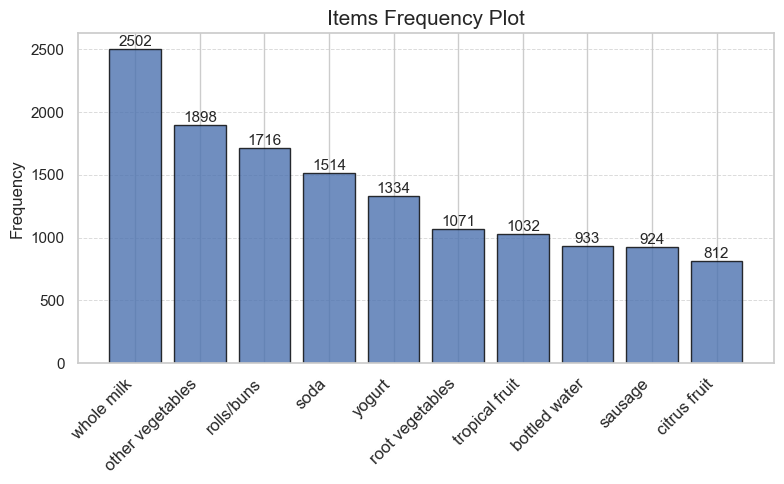

In [125]:

#select 10 products for better visualization
df_sample = df_table.sort_values(by='Freq', ascending=False).head(10)

# defin the range of x positions
x_positions = np.arange(len(df_sample))

# Create a figure and axis object.
plt.figure(figsize=(8, 5))

# Plot the bars (using the same color and edge style as your example).
plt.bar(x_positions, df_sample['Freq'], color="#4c72b0", width=0.8, edgecolor="black", alpha=0.8)

# Add the frequency values on top of each bar.
for i, (count, product) in enumerate(zip(df_sample['Freq'], df_sample['itemDescription'])):
    plt.text(i, count + 0.1, f"{count}", ha="center", va="bottom", fontsize=11)

# Customize x-axis ticks and labels.
plt.xticks(x_positions, df_sample['itemDescription'], rotation=45, ha="right", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Add gridlines (only horizontal, similar to your theme).
plt.grid(axis="y", linestyle="--", linewidth=0.7, alpha=0.7)

# Add title
plt.title("Items Frequency Plot", fontsize=15)

# make layour not so tight
plt.tight_layout()

# Display the plot.
plt.show()


As plot shows, whole milk is the best-selling product by far, followed by other vegetables and rolls/buns. Let’s display some other visualizations describing the time distribution of the purchases.

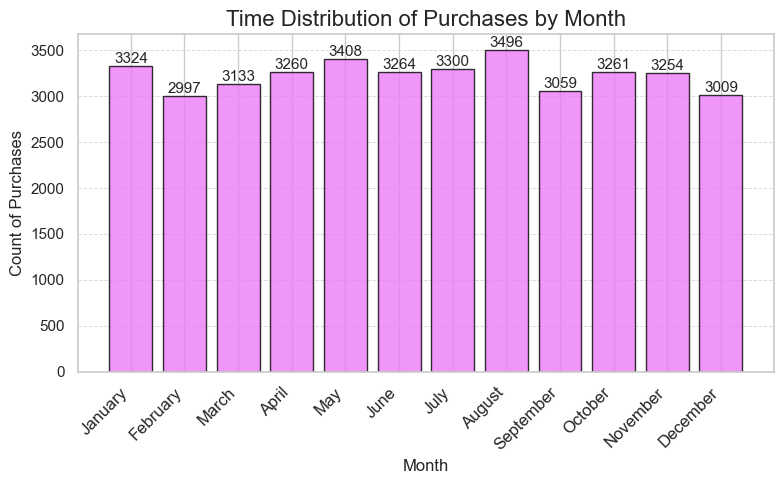

In [128]:

# Convert the "Date" column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Extract the month number from the "Date" column
data['Month'] = data['Date'].dt.month

# Group by month and count the number of purchases (transactions)
month_counts = data['Month'].value_counts().sort_index()

# Optionally, map month numbers to month names for better readability
month_counts.index = month_counts.index.map(lambda x: calendar.month_name[x])

# Create x positions for each month (if needed)
x_positions = np.arange(len(month_counts))

# Plot the bar chart using the provided theme
plt.figure(figsize=(8, 5))
plt.bar(x_positions, month_counts.values, color="#eb7cf7", width=0.8, edgecolor="black", alpha=0.8) 

# Add the count labels on top of each bar
for i, count in enumerate(month_counts.values):
    plt.text(i, count + 0.1, f"{count}", ha="center", va="bottom", fontsize=11)

# Customize the x-axis ticks and labels
plt.xticks(x_positions, month_counts.index, rotation=45, ha="right", fontsize=12)
plt.ylabel("Count of Purchases", fontsize=12)
plt.xlabel("Month", fontsize=12)

# Add gridlines on the y-axis
plt.grid(axis="y", linestyle="--", linewidth=0.7, alpha=0.7)

plt.title("Time Distribution of Purchases by Month", fontsize=16)
plt.tight_layout()

# Display the plot
plt.show()

In [133]:
# Group by date and count the number of transactions per day
daily_counts = data.groupby(data['Date'].dt.date).size().reset_index(name="Number of Purchases")

# Create an interactive line plot
fig = px.line(daily_counts, x="Date", y="Number of Purchases",
              markers=False, 
              title="Interactive Time Series of Purchases",
              labels={"Date": "Date", "Number of Purchases": "Number of Purchases"},
              template="plotly_white")

# Customize marker size and line width
fig.update_traces(marker=dict(size=8), line=dict(width=2, color="#4c72b0"))

# Update layout for better readability
fig.update_layout(
    xaxis=dict(showgrid=True, tickangle=45),
    yaxis=dict(showgrid=True),
    title_font=dict(size=16),
    font=dict(size=12),
    hovermode="x unified"
)

# Show the interactive plot
fig.show()

### Data pre-processing


Before we perform market basket analysis, we need to convert this data into a format that can easily be ingested into the Apriori algorithm. 
In other words, we need to transform the data into a one-hot encoded DataFrame. 
This means that we need to transform the data into a format where each row represents a unique transaction and each column represents a unique item. 
The values in the DataFrame will be 0 or 1, where 0 indicates that the item is not in the transaction and 1 indicates that the item is in the transaction.

Here is what the one-hot encoded DataFrame looks like:


|    | Milk       | Beer | Eggs | Bread | Bananas | Apples | ... |
|----|------------|------|------|-------|---------|--------|-----|
| Basket 1 | 1 | 0 | 1 | 1 | 0 | 0 | ... |
| Basket 2 | 0 | 1 | 1 | 0 | 1 | 0 | ... |
| ... | ... | ... | ... | ... | ... | ... | ... |


To achieve this, the first group items that have the same`Invoice_id` and `itemDescription`:


In [134]:
# Group the data by Invoice_id and itemDescription and count the number of items
transactions_str = data.groupby(['Invoice_id', 'itemDescription'])['itemDescription'].count().reset_index(name ='Count')
# Check the first 5 rows of the dataframe
transactions_str.head(5)

,Invoice_id,itemDescription,Count
0,1000_15-03-2015,sausage,1
1,1000_15-03-2015,semi-finished bread,1
2,1000_15-03-2015,whole milk,1
3,1000_15-03-2015,yogurt,1
4,1000_24-06-2014,pastry,1


The next step is to convert the dataframe into a transactional (basket) format. This means that we need to convert the dataframe into a format where each row represents a unique transaction (basket) and each column represents a unique item. We can do this by using the `pivot_table` function in pandas.

In [135]:
# Convert the dataframe to a pivot table
basket = transactions_str.pivot_table(index='Invoice_id', columns='itemDescription', values='Count', aggfunc='sum').fillna(0)

# Check the first 5 rows of the dataframe
basket.head(5)

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Invoice_id,,,,,,,,,,,,,,,,,,,,,
1000_15-03-2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1000_24-06-2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1000_24-07-2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000_25-11-2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000_27-05-2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The resulting table tells us how many times each item has been purchased in one transaction.

There are over a hundred columns while most people only shop for 2-3 items, which is why this table is sparse and mostly comprised of zeroes.

The final data pre-processing step involves encoding all values to binary values (0 and 1).

This means that even if there are multiples of the same item in the same transaction, the value will be encoded to 1 since market basket analysis does not take purchase frequency into consideration.

In [136]:
# Convert the values to 1s and 0s
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    
basket_sets = basket.applymap(encode_units)

# Check the first 5 rows of the dataframe
basket_sets.head(5)


itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Invoice_id,,,,,,,,,,,,,,,,,,,,,
1000_15-03-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000_24-06-2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000_24-07-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_25-11-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_27-05-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Build the Apriori Algorithm using `MLXtend` library

Now, let’s import the Apriori algorithm from the `MLXtend` Python package and use it to discover frequently-bought-together item combinations:

In [137]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [180]:
# Build up the frequent items
frequent_itemsets = apriori(basket_sets, min_support=0.007, use_colnames=True)

# Display the first 5 rows of the dataframe sorted by support
frequent_itemsets.sort_values(by="support", ascending=False).head(5)

,support,itemsets
73,0.157923,(whole milk)
45,0.122101,(other vegetables)
55,0.110005,(rolls/buns)
63,0.097106,(soda)
74,0.085879,(yogurt)


From the output, we can see that the most frequent item is whole milk, followed by other items such as other vegetables, rolls/buns, soda, yogurt, etc.
The support value for the whole milk is 0.157923, which means that the whole milk is purchased in 15.79% of all transactions.

```{note}
We used the min_support parameter to set the minimum support value to 0.005. This means that we are only interested in itemsets that are purchased in at least 0.5% of the transactions.
```

Next we will generate the rules with their corresponding support, confidence and lift. We will also filter the rules based on a condition of lift greater than 0.5.




```{note}
You can change the values of the parameters to see how the rules change. For example, you can increase the value of min_confidence to 0.6 and see how the rules change. Or you can increase the value of min_lift to 0.5 and see how the rules change.
```

In [181]:
# Generate the rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)

# Display the first 5 rows of the dataframe sorted by confidence
rules.sort_values(by="lift", ascending=False).head(5)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,-0.000005,0.999874,-0.000702
1,(whole milk),(bottled beer),0.157923,0.045312,0.007151,0.045281,0.999330,-0.000005,0.999968,-0.000795
22,(sausage),(whole milk),0.060349,0.157923,0.008955,0.148394,0.939663,-0.000575,0.988811,-0.063965
23,(whole milk),(sausage),0.157923,0.060349,0.008955,0.056708,0.939663,-0.000575,0.996140,-0.070851
4,(citrus fruit),(whole milk),0.053131,0.157923,0.007151,0.134591,0.852259,-0.001240,0.973040,-0.154748


Here the “antecedents” and “consequents” columns show the itemsets items that are frequently purchased together. The “antecedent support” and “consequent support” columns show the support values for the antecedent and consequent itemsets, respectively. The “support” column shows the support values for the itemsets, and the “confidence” column shows the confidence level of the rules. The “lift” column represents the lift value of the rules.

In this example, the first rule shows that the antecedent *{whole milk}* and the consequent *{yogurt}* are frequently purchased together. The support value for the antecedent is 0.0157, the support value for the consequent is 0.085, and the support value for the itemset {whole milk, yogurt} is 0.011. The confidence level of the rule is 0.070, and the lift value of the rule is 0.822.

### Visualizing the rules

In order to better understand the rules, we can use a heatmap to visualize the support, confidence, and lift of the rules.
Heatmaps help us understand a large number of rules between a small number of antecedents and consequents

First we need to convert the antecedents and consequents into strings to better show the item descriptions on the plot.

In [182]:
# Convert the frozensets into strings
rules['antecedents'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

# Display the first 5 rows of the dataframe
rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,bottled beer,whole milk,0.045312,0.157923,0.007151,0.157817,0.999330,-0.000005,0.999874,-0.000702
1,whole milk,bottled beer,0.157923,0.045312,0.007151,0.045281,0.999330,-0.000005,0.999968,-0.000795
2,bottled water,whole milk,0.060683,0.157923,0.007151,0.117841,0.746196,-0.002432,0.954564,-0.265842
3,whole milk,bottled water,0.157923,0.060683,0.007151,0.045281,0.746196,-0.002432,0.983868,-0.287708
4,citrus fruit,whole milk,0.053131,0.157923,0.007151,0.134591,0.852259,-0.001240,0.973040,-0.154748


Next we need to use pivot_table to convert the dataframe into a pivot table:

In [183]:
# Create a pivot table for the rules
pivot_rules = rules.pivot_table(index='antecedents', columns='consequents', values='lift')

# Display the first 5 rows of the dataframe
pivot_rules.head(5)

consequents,bottled beer,bottled water,citrus fruit,other vegetables,rolls/buns,root vegetables,sausage,soda,tropical fruit,whole milk,yogurt
antecedents,,,,,,,,,,,
bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999330,NaN
bottled water,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.746196,NaN
citrus fruit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.852259,NaN
other vegetables,NaN,NaN,NaN,NaN,0.786154,NaN,NaN,0.817302,NaN,0.769430,0.771192
rolls/buns,NaN,NaN,NaN,0.786154,NaN,NaN,NaN,0.757022,NaN,0.804028,0.827697


Now we can use the pivot table to visualize the rules using a heatmap. we use the seaborn library to create a heatmap of the pivot table.

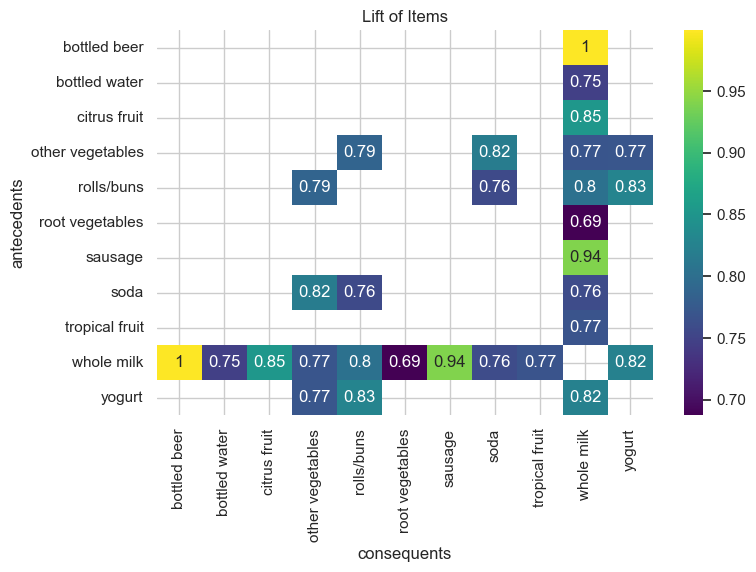

In [184]:
# Plot the pivot table
plt.figure(figsize=(8, 5))
sns.heatmap(pivot_rules, annot=True, cmap="viridis")
plt.title("Lift of Items")
plt.show()



```{note}
You can try to display the pivot table for the confidence and support as well. This will give you a better understanding of the relationship between the items.
```

## Choice of support and confidence

As we saw, The first step in order to create a set of association rules is to determine the optimal thresholds for support and confidence. Choosing the proper support and confidence is important.  If we set these values too low, then the algorithm will take longer to execute and we will get a lot of rules (most of them will not be useful). Then, what values do we choose? We can try different values of support and confidence and see graphically how many rules are generated for each combination.

First let's take a look at our `basket_sets` again:

In [144]:
basket_sets.head(3)

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Invoice_id,,,,,,,,,,,,,,,,,,,,,
1000_15-03-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000_24-06-2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000_24-07-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In the following graphs we can see the number of rules generated with a support level of 10%, 5%, 1% and 0.5%.



In [186]:
support_levels = [0.01, 0.009, 0.008, 0.007, 0.006, 0.005]  # Different minimum support levels
lift_levels = np.arange(0.5, 1, 0.05)  # Lift levels from 0.5 to 1.0


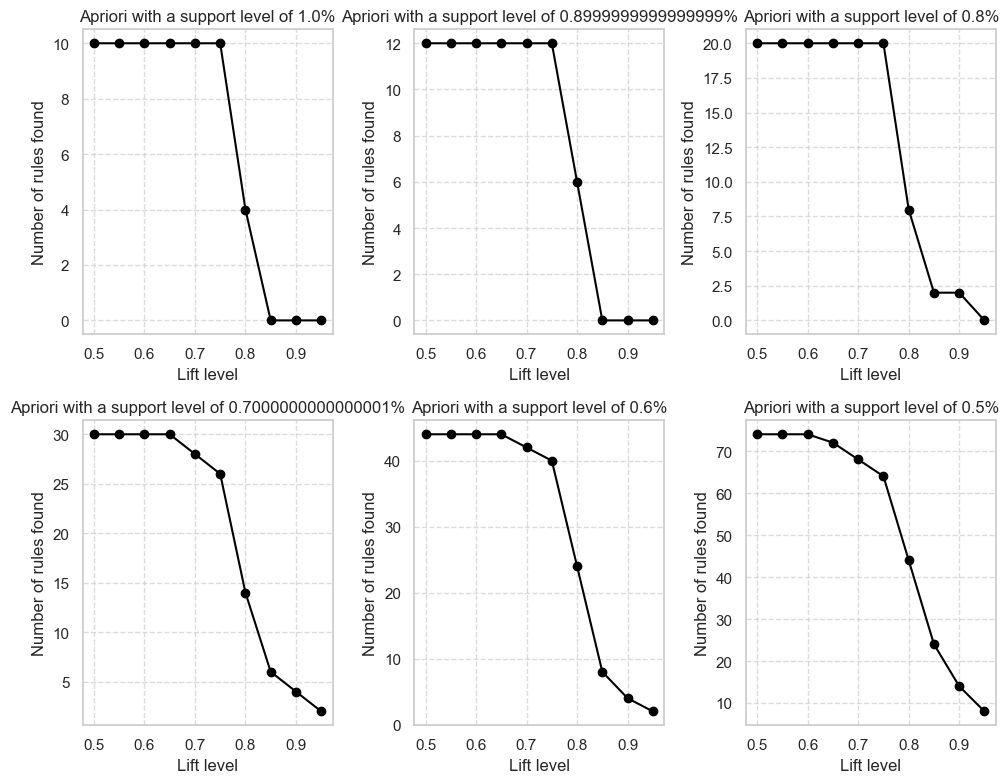

In [187]:
# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(10, 8))
axes = axes.flatten()


for idx, support in enumerate(support_levels):
    # Apply Apriori algorithm
    frequent_itemsets = apriori(basket_sets, min_support=support, use_colnames=True)

    num_rules = []
    for lif in lift_levels:
        sub_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=lif)
        num_rules.append(len(sub_rules))  # Store the number of rules for each lift level

    # Plot results
    ax = axes[idx]
    ax.plot(lift_levels, num_rules, marker='o', linestyle='-', color="black")
    ax.set_title(f"Apriori with a support level of {support * 100}%")
    ax.set_xlabel("Lift level")
    ax.set_ylabel("Number of rules found")
    ax.grid(True, linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()


If we want to analyze the results, for example with support level of 0.5%, there are too many rules to analyse compare to support level of 1%. With support level of 1% we only idetify few rules with low lift levels. That suggest maybe there are no relatively frequent associations in our dataset. We probably can not choose this value. 


## Summary

In summary, in this tutorial, we have learned:
- What is market basket analysis and how it can be used to find the association between items in a dataset. 
- How to perform market basket analysis using the Apriori algorithm using MLXtend library in Python. 
- How to generate association rules using MLXtend library in Python.
- Visualize the results using a heatmap.

This is just a simple example of how to perform market basket analysis using Python. There are many other ways to perform market basket analysis and generate association rules.
You can use different libraries and algorithms to perform market basket analysis. You can also use different metrics to generate association rules.
    